In [22]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load the CSV data
file_path = 'Regulatory Affairs of Road Accident Data 2020 India.csv'
df = pd.read_csv(file_path)

In [24]:
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [25]:
df.tail()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0
9549,Vizaq,Weather,Sunny/Clear,Total Injured,813.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [27]:
# Check for missing values
print(df.isnull().sum())


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


In [28]:
# Handle missing values (e.g., filling with zero or dropping)
df.fillna(0, inplace=True)

In [29]:
# Create an SQLite connection
conn = sqlite3.connect('road_accidents.db')
cursor = conn.cursor()

# Create a table in SQLite for the dataset
df.to_sql('accidents', conn, if_exists='replace', index=False)

# Verify the table creation
cursor.execute("SELECT * FROM accidents LIMIT 5").fetchall()


[('Agra',
  'Traffic Control',
  'Flashing Signal/Blinker',
  'Greviously Injured',
  0.0),
 ('Agra', 'Traffic Control', 'Flashing Signal/Blinker', 'Minor Injury', 0.0),
 ('Agra', 'Traffic Control', 'Flashing Signal/Blinker', 'Persons Killed', 0.0),
 ('Agra', 'Traffic Control', 'Flashing Signal/Blinker', 'Total Injured', 0.0),
 ('Agra',
  'Traffic Control',
  'Flashing Signal/Blinker',
  'Total number of Accidents',
  0.0)]

Accident Distribution Across Cities


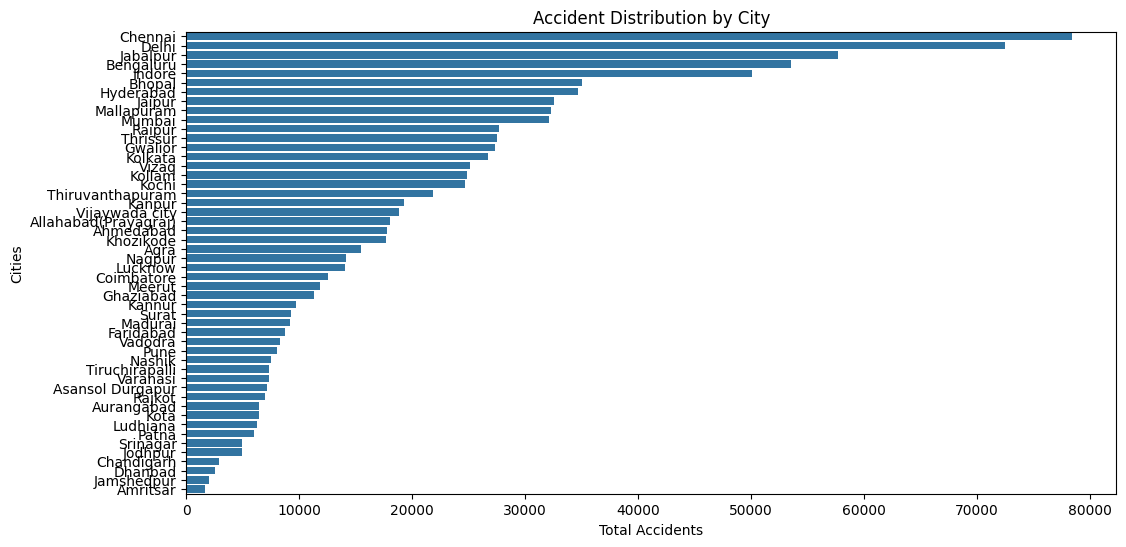

In [30]:
print("Accident Distribution Across Cities")
# SQL Query to count accidents by city
query_city_accidents = """
SELECT "Million Plus Cities", SUM(Count) as Total_Accidents
FROM accidents
GROUP BY "Million Plus Cities"
ORDER BY Total_Accidents DESC
"""
city_accidents = pd.read_sql_query(query_city_accidents, conn)

plt.figure(figsize=(12, 6))
sns.barplot(y=city_accidents['Million Plus Cities'], x=city_accidents['Total_Accidents'])
plt.title('Accident Distribution by City')
plt.xlabel('Total Accidents')
plt.ylabel('Cities')
plt.show()


Accident Causes Analysis


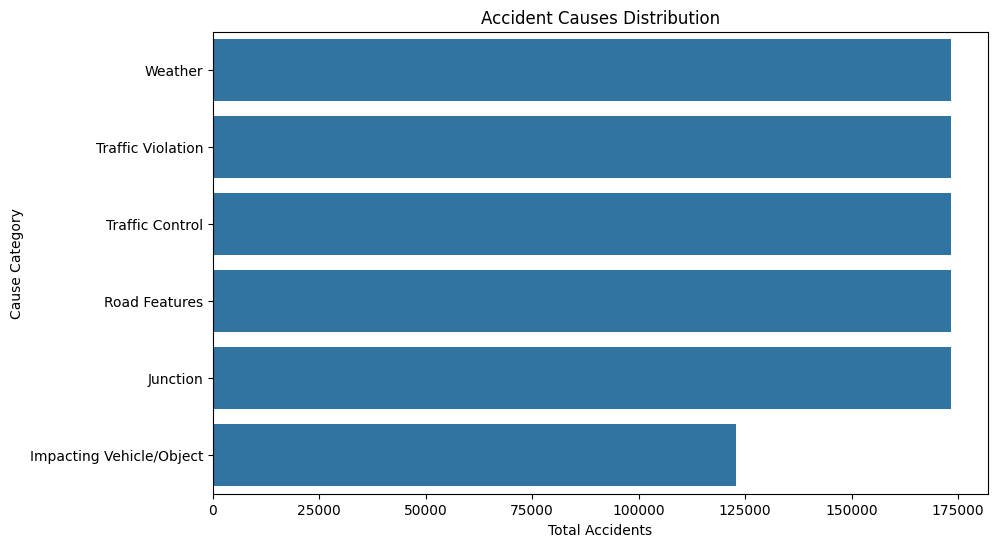

In [31]:
print("Accident Causes Analysis")
# SQL Query to get the count of accidents by Cause category
query_cause_accidents = """
SELECT "Cause category", SUM(Count) as Total_Accidents
FROM accidents
GROUP BY "Cause category"
ORDER BY Total_Accidents DESC
"""
cause_accidents = pd.read_sql_query(query_cause_accidents, conn)

# Plotting Accident Causes
plt.figure(figsize=(10, 6))
sns.barplot(y=cause_accidents['Cause category'], x=cause_accidents['Total_Accidents'])
plt.title('Accident Causes Distribution')
plt.xlabel('Total Accidents')
plt.ylabel('Cause Category')
plt.show()


Outcomes of Accidents


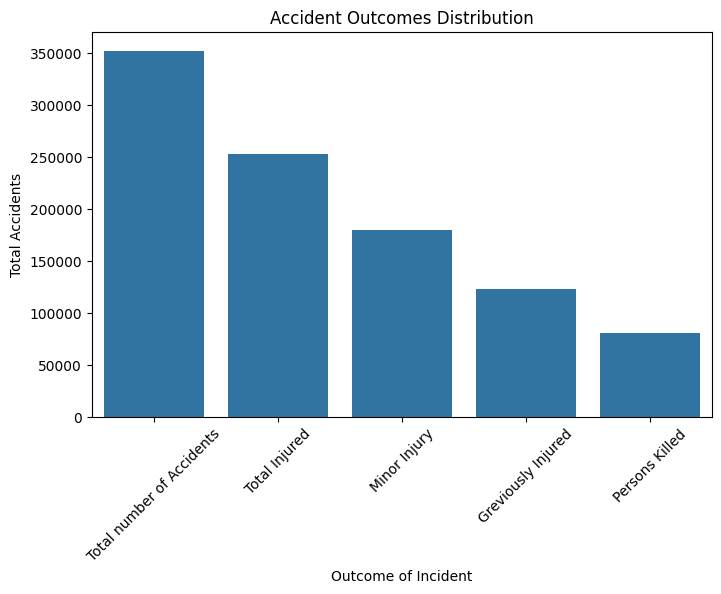

In [32]:
print("Outcomes of Accidents")
# SQL Query to get the count of accidents by Outcome of Incident
query_outcome_accidents = """
SELECT "Outcome of Incident", SUM(Count) as Total_Accidents
FROM accidents
GROUP BY "Outcome of Incident"
ORDER BY Total_Accidents DESC
"""
outcome_accidents = pd.read_sql_query(query_outcome_accidents, conn)

# Plotting Accident Outcomes
plt.figure(figsize=(8, 5))
sns.barplot(x=outcome_accidents['Outcome of Incident'], y=outcome_accidents['Total_Accidents'])
plt.title('Accident Outcomes Distribution')
plt.xlabel('Outcome of Incident')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.show()


Accident Causes vs Outcomes


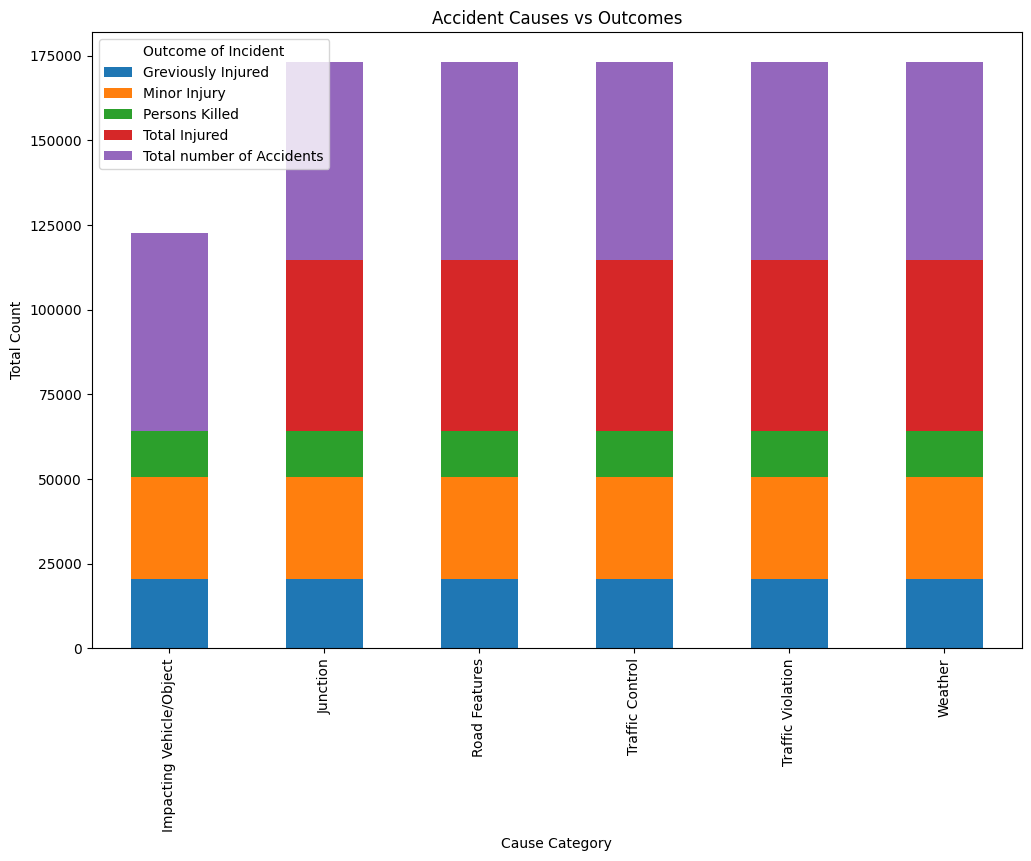

In [33]:
print("Accident Causes vs Outcomes")
# SQL Query to analyze Cause category vs Outcome
query_cause_vs_outcome = """
SELECT "Cause category", "Outcome of Incident", SUM(Count) as Total_Count
FROM accidents
GROUP BY "Cause category", "Outcome of Incident"
"""
cause_vs_outcome = pd.read_sql_query(query_cause_vs_outcome, conn)

# Pivoting the data for stacked bar plot
cause_outcome_pivot = cause_vs_outcome.pivot(index='Cause category', columns='Outcome of Incident', values='Total_Count')

# Plotting stacked bar plot
cause_outcome_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Accident Causes vs Outcomes')
plt.xlabel('Cause Category')
plt.ylabel('Total Count')
plt.show()


Top 10 Cities with the Most and Least Accidents


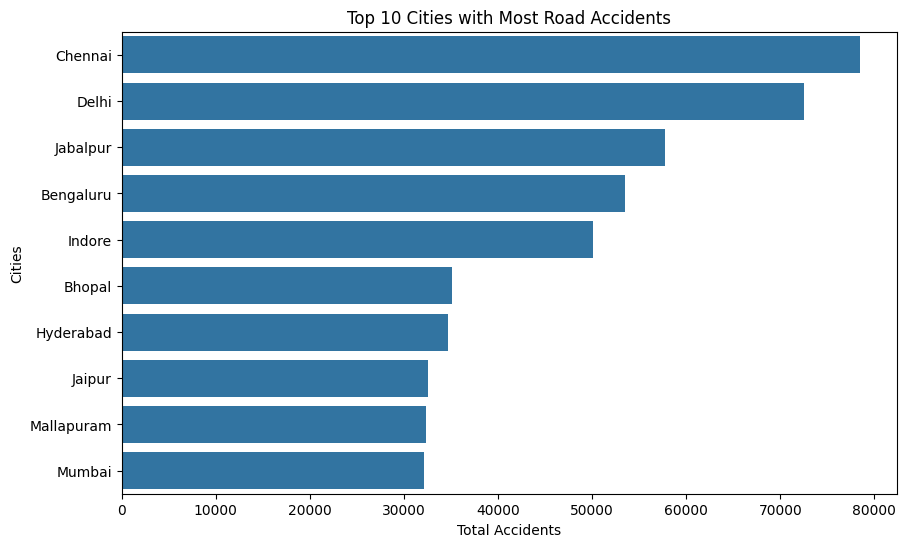

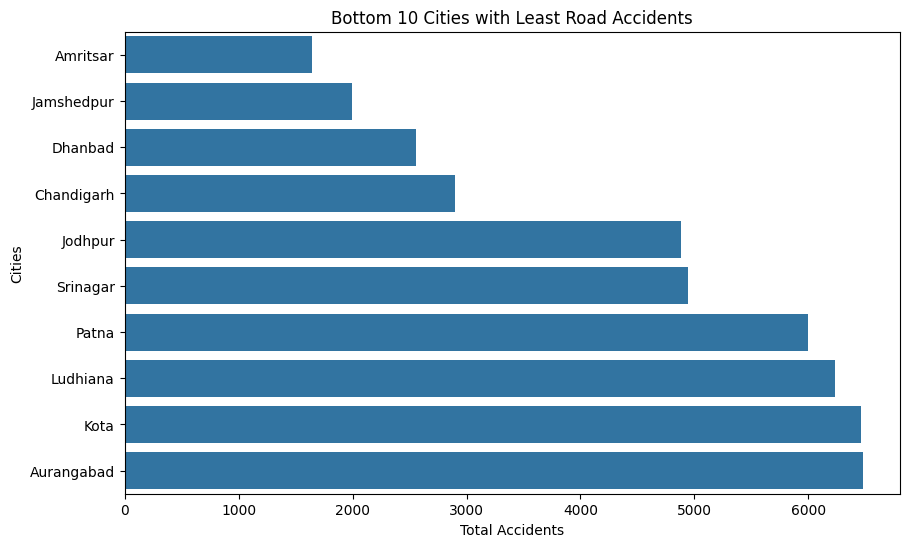

In [34]:
print("Top 10 Cities with the Most and Least Accidents")
# SQL Query to get top 10 cities with the most accidents
query_top_cities = """
SELECT "Million Plus Cities", SUM(Count) as Total_Accidents
FROM accidents
GROUP BY "Million Plus Cities"
ORDER BY Total_Accidents DESC
LIMIT 10
"""
top_cities = pd.read_sql_query(query_top_cities, conn)

# Plot top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(y=top_cities['Million Plus Cities'], x=top_cities['Total_Accidents'])
plt.title('Top 10 Cities with Most Road Accidents')
plt.xlabel('Total Accidents')
plt.ylabel('Cities')
plt.show()

# SQL Query to get bottom 10 cities with the least accidents
query_least_cities = """
SELECT "Million Plus Cities", SUM(Count) as Total_Accidents
FROM accidents
GROUP BY "Million Plus Cities"
ORDER BY Total_Accidents ASC
LIMIT 10
"""
least_cities = pd.read_sql_query(query_least_cities, conn)

# Plot bottom 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(y=least_cities['Million Plus Cities'], x=least_cities['Total_Accidents'])
plt.title('Bottom 10 Cities with Least Road Accidents')
plt.xlabel('Total Accidents')
plt.ylabel('Cities')
plt.show()


Correlation Between Accident Causes and Outcomes


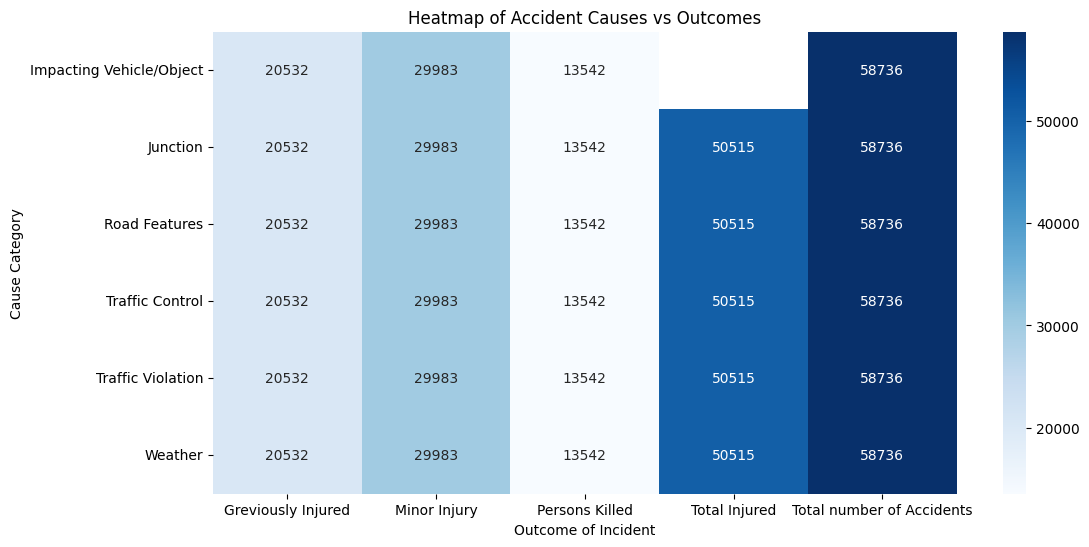

In [35]:
print("Correlation Between Accident Causes and Outcomes")
# SQL Query to group accidents by cause and outcome
query_cause_outcome_corr = """
SELECT "Cause category", "Outcome of Incident", SUM(Count) as Total_Count
FROM accidents
GROUP BY "Cause category", "Outcome of Incident"
"""
cause_outcome_corr = pd.read_sql_query(query_cause_outcome_corr, conn)

# Correlation matrix between Cause Category and Outcome
cause_outcome_pivot_corr = cause_outcome_corr.pivot(index='Cause category', columns='Outcome of Incident', values='Total_Count')

# Plot heatmap of correlation
plt.figure(figsize=(12, 6))
sns.heatmap(cause_outcome_pivot_corr, annot=True, fmt="g", cmap="Blues")
plt.title('Heatmap of Accident Causes vs Outcomes')
plt.xlabel('Outcome of Incident')
plt.ylabel('Cause Category')
plt.show()


Analysis of Specific Accident Types 


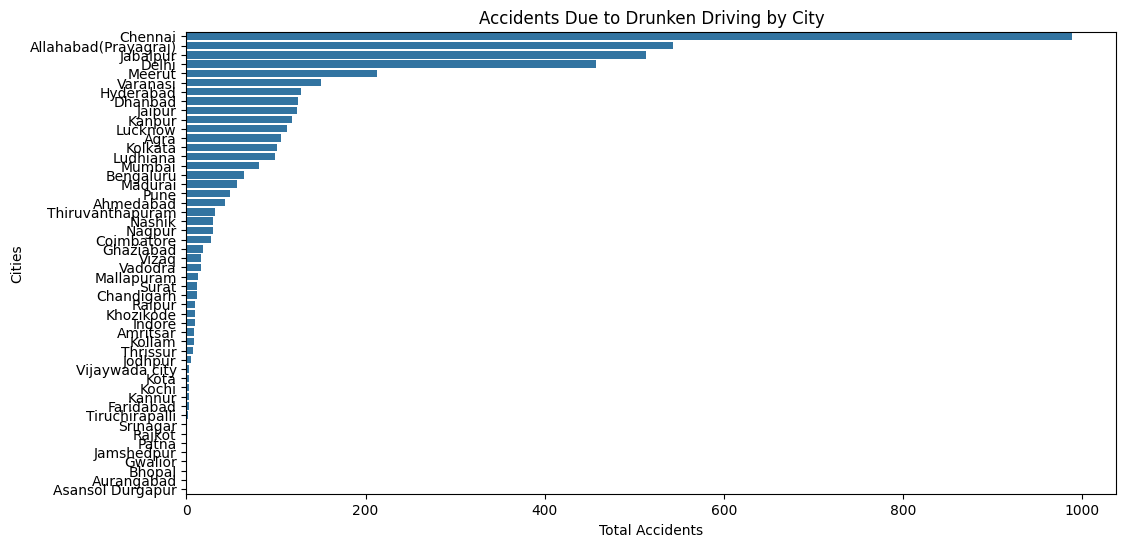

In [36]:
print("Analysis of Specific Accident Types ")
# SQL Query to analyze accidents caused by Drunken Driving
query_drunken_driving = """
SELECT "Million Plus Cities", "Cause Subcategory", SUM(Count) as Total_Accidents
FROM accidents
WHERE "Cause Subcategory" = 'Drunken Driving/ Consumption of alcohol and drug'
GROUP BY "Million Plus Cities"
ORDER BY Total_Accidents DESC
"""
drunken_driving = pd.read_sql_query(query_drunken_driving, conn)

# Plot accidents caused by drunken driving
plt.figure(figsize=(12, 6))
sns.barplot(y=drunken_driving['Million Plus Cities'], x=drunken_driving['Total_Accidents'])
plt.title('Accidents Due to Drunken Driving by City')
plt.xlabel('Total Accidents')
plt.ylabel('Cities')
plt.show()


Impact of Weather Conditions on Accidents


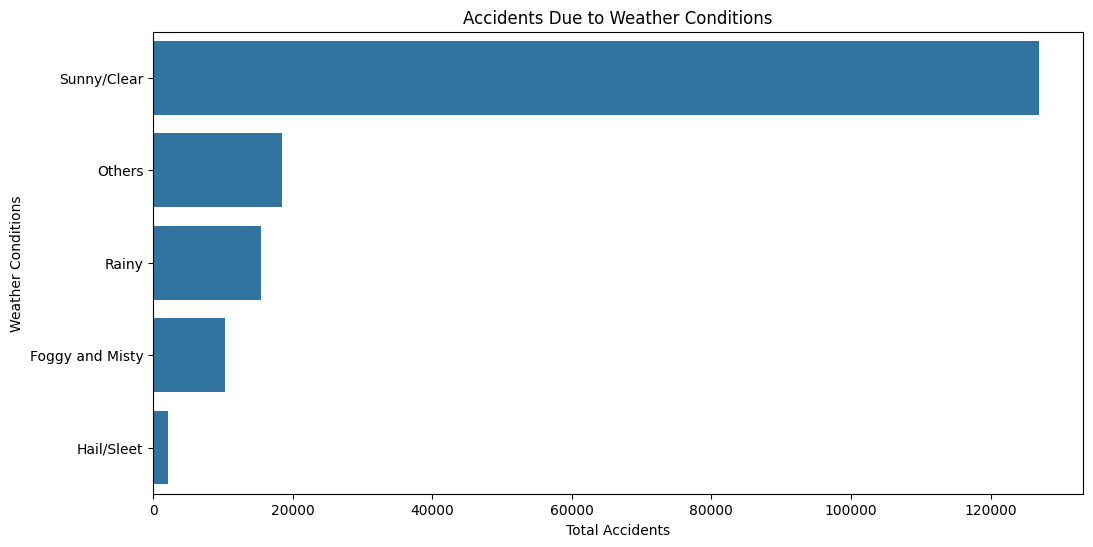

In [37]:
print("Impact of Weather Conditions on Accidents")
# SQL Query to analyze accidents by weather condition
query_weather_conditions = """
SELECT "Cause Subcategory", SUM(Count) as Total_Accidents
FROM accidents
WHERE "Cause category" = 'Weather'
GROUP BY "Cause Subcategory"
ORDER BY Total_Accidents DESC
"""
weather_accidents = pd.read_sql_query(query_weather_conditions, conn)

# Plot accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.barplot(y=weather_accidents['Cause Subcategory'], x=weather_accidents['Total_Accidents'])
plt.title('Accidents Due to Weather Conditions')
plt.xlabel('Total Accidents')
plt.ylabel('Weather Conditions')
plt.show()


Fatal vs Non-Fatal Outcomes in Cities


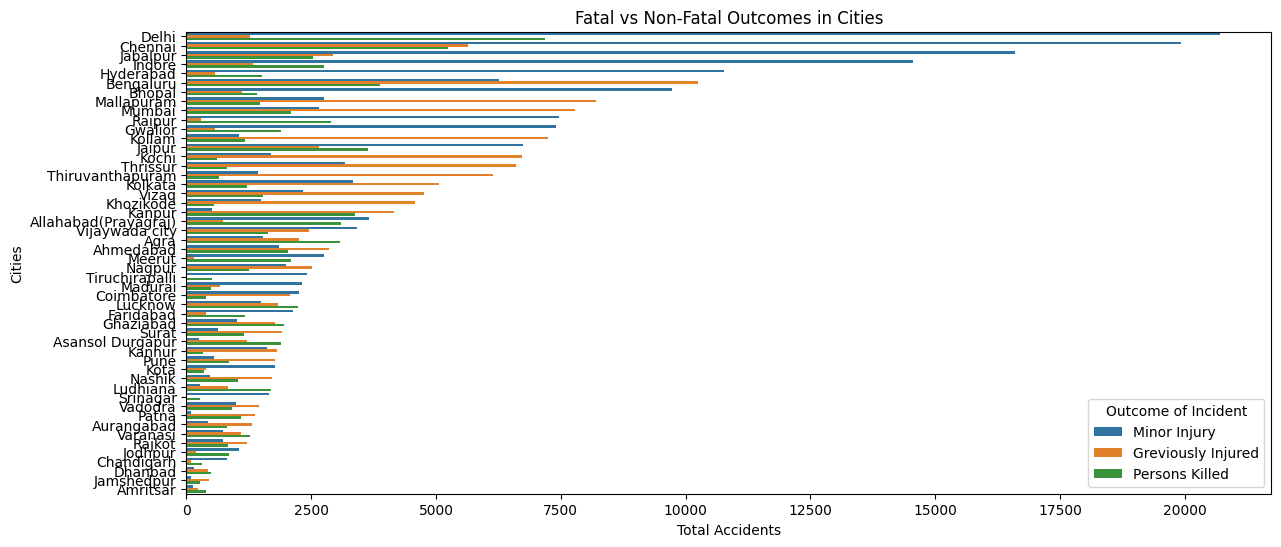

In [38]:
print("Fatal vs Non-Fatal Outcomes in Cities")
# SQL Query to analyze fatal and non-fatal outcomes
query_fatal_nonfatal = """
SELECT "Million Plus Cities", "Outcome of Incident", SUM(Count) as Total_Accidents
FROM accidents
WHERE "Outcome of Incident" IN ('Persons Killed', 'Minor Injury', 'Greviously Injured')
GROUP BY "Million Plus Cities", "Outcome of Incident"
ORDER BY Total_Accidents DESC
"""
fatal_nonfatal_accidents = pd.read_sql_query(query_fatal_nonfatal, conn)

# Plot fatal vs non-fatal outcomes by city
plt.figure(figsize=(14, 6))
sns.barplot(y=fatal_nonfatal_accidents['Million Plus Cities'], x=fatal_nonfatal_accidents['Total_Accidents'], hue=fatal_nonfatal_accidents['Outcome of Incident'])
plt.title('Fatal vs Non-Fatal Outcomes in Cities')
plt.xlabel('Total Accidents')
plt.ylabel('Cities')
plt.legend(title='Outcome of Incident')
plt.show()
